# Frequency Series Fitting (With Empirical Model)

Let's say we have some measured amplitude spectral density of the LVDT noise named lvdt_noise and we want to fit it.
Here, we will demonstrate the use of kontrol's frequency series class and and we will fit it using a builtin LVDT noise model. We will fit the data with and without a 1/f weighting. This particular weighting is useful in some circumstances. The fit here basically minimizes a logarithmic mean square error cost function. We will demonstrate the use of other a typical mean square error function as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import kontrol
import kontrol.core.math
import kontrol.frequency_series.noise_models


np.random.seed(123)

f = np.linspace(1e-2, 1e2, 1000)
lvdt_noise = kontrol.frequency_series.noise_models.lvdt_noise(f)

# Let's add some noisy data to mimick real measurement.
noisy_data_db = np.random.uniform(-1, 1, 1000)  # Some random noise between -1 and 1 dB.
lvdt_noise = lvdt_noise * 10**(noisy_data_db/20)

# Now let's fit the measured sensor noise using kontrol.
# We first define a frequency series instance.
fs = kontrol.FrequencySeries(f=f, x=lvdt_noise)

# We use kontrol's LVDT noise model as the model of the frequency series.
model = kontrol.frequency_series.noise_models.lvdt_noise

# We use a 1/f weighting function to accommodate for linspace data in logspace.
weight = 1/f
error_func_kwargs = {"weight":weight}
x0 = np.array([8e-3, 4.5, -0.5, 0.])  # We passed in an initial value for the sake of demonstration.
res = fs.fit_empirical(model=model, x0=x0, error_func_kwargs=error_func_kwargs)

# Let's do it again without weighting and see what's the difference.
fs_wo_weight = kontrol.FrequencySeries(f=f, x=lvdt_noise)
res2 = fs_wo_weight.fit_empirical(model=model)

# Now we use a mean square error cost function instead of the default logarithmic one.
error_func = kontrol.core.math.mse
fs_mse = kontrol.FrequencySeries(f=f, x=lvdt_noise)
res3 = fs_mse.fit_empirical(model=model, error_func=error_func, error_func_kwargs=error_func_kwargs)


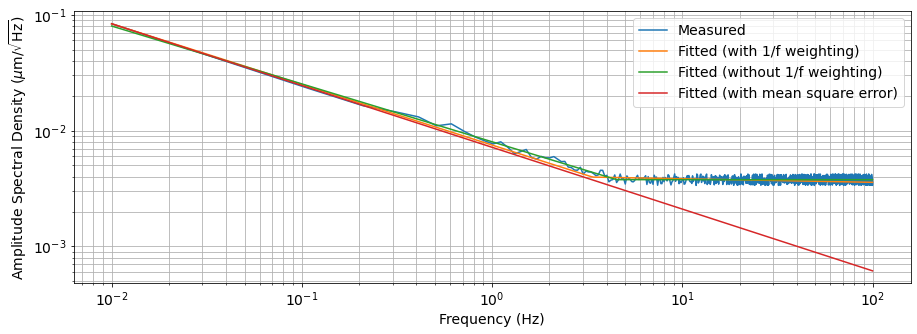

In [2]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,5))
plt.loglog(f, fs.x, label="Measured")
plt.loglog(f, fs.x_empirical, label="Fitted (with 1/f weighting)")
plt.loglog(f, fs_wo_weight.x_empirical, label="Fitted (without 1/f weighting)")
plt.loglog(f, fs_mse.x_empirical, label="Fitted (with mean square error)")
plt.ylabel("Amplitude Spectral Density ($\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")
plt.legend(loc=0)
plt.grid(which="both")

Model parameters:

True values are [0.008, 4.5, -0.5, 0].

Pick your poison.

In [3]:
res.x  # fitted with least log mean square and 1/f weighting

array([ 0.00750406,  3.37471095, -0.52368625, -0.03072566])

In [4]:
res2.x  # fitted with least log mean square and initial guess

array([ 7.99884789e-03,  4.49950339e+00, -5.00079714e-01, -4.02009965e-05])

In [5]:
res3.x  # fitted with least mean square. It didn't care about the data with lower magnitudes.

array([ 7.17586042e-03,  2.40204575e+02, -5.33430687e-01,  6.43299005e+01])